# Espalhamento e Tunelamento Quântico

* Matéria: Física Quântica
* Aluno: José Arthur de Luna Oliveira
* Professor: Bruno Ricardo de Carvalho
* Data:

$\quad$ Neste trabalho discutiremos sobre o espalhamento e tunelamento quântico.

Neste `Notebook` haverá as seguintes seções:

* Introdução;
* Desenvolvimento do Problema;
* Conclusão.

## Importando Bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def plot_ticks(): #essa é uma função que mexe na aparência dos gráficos
    plt.figure(figsize = (8,5))
    plt.minorticks_on()
    plt.tick_params(axis='x', which='both', top = True, right = True, direction = 'in', length=5, width=1)
    plt.tick_params(axis='y', which='both', top = True, right = True, direction = 'in', length=5, width=1)

## Detalhes da Biblioteca

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy

Software versions
Python 3.11.8 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.20.0
OS Windows 10 10.0.22631 SP0
Matplotlib 3.8.0
Numpy 1.26.4
Mon May 06 19:53:12 2024 Hora Padrão de Buenos Aires

## 1. Introdução

$\quad$ O espalhamento quântico é um fenômeno fundamental na Mecânica Quântica. Ele envolve o comportamento das partículas antes e após colidirem entre si. Durante o espalhamento, as propriedades das partículas, como sua posição, momento e energia, podem ser alteradas devido à interação. Entretanto, as leis da Mecânica Quântica determinam que essas mudanças não podem ser previstas de maneira determinística, apenas em termos de probabilidades. 

$\quad$ O principal exemplo é o espalhamento de elétrons por núcleos atômicos. No qual, ocorre quando um elétron se aproxima de um núcleo atômico, ela pode ser desviada de sua trajetória original devido à interação eletromagnética entre as cargas elétricas do elétron e do núcleo. O resultado desse espalhamento pode variar de acordo com diversos fatores, incluindo a energia do elétron, a distância de aproximação e as propriedades específicas do núcleo. Em geral, o espalhamento quântico é o tipo de processos em que um estado inicial contínuo é transformado em um final contínuo através da ação de algum potencial **[2]**.

$\quad$ Para trabalharmos nesse problema, imaginemos uma partícula livre, viajando da direita para a esquerda, com energia $E$ em uma região I ($x \leq 0$), em $x>0$ é a região II onde há ação de potencial $V = V_0$. Na Mecânica Clássica, as duas possibilidades de resultados, caso $E<V_0$ a partícula é refletida, ela não consegue ir para a região II, entretanto, se $E>V_0$ ela consegue passar para a outra região. Em contrapartida, na Mecânica Quântica, se $E<V_0$ existe probabilidade da partícula passar para a região II, esse fenômeno é chamado de Tunelamento.

### 1.1 Desenvolvimento do problema

$\quad$ Dito isso, para conseguirmos desenvolver o problema trocaremos a partícula por um pacote de onda $\psi_I(x)$, na qual quando atinge a barreira de potencial haverá uma onda refletida $\psi_R(x)$ e outra transmitidas $\psi_T(x)$. O problema em questão é encontrar a probabilidade de encontrar a partícula na região I ($R$) e a probabilidade de encontrar na região II ($T$), para encontrar esses dois valores basta determinar as seguintes integrais,

$$ R = \int |\psi_R|^2dx \ , \tag{1.1}$$

$$T = \int |\psi_T|^2dx \ ,\tag{1.2}$$

devemos calcula-las considerando $t \rightarrow \infty$. 

$\quad$ Em geral, $R$ e $T$ dependem diretamente do corpo da função de onda incidente. No entanto, mantendo o momento inicial bem definido, ou seja, $\Delta p \rightarrow 0$ e $\Delta x \rightarrow \infty$. Assim, o resultado dependerá apenas do valor da energia inicial **[1]**.

$\quad$ Para este problema consideraremos um potencial degrau de forma que será definido da seguinte forma

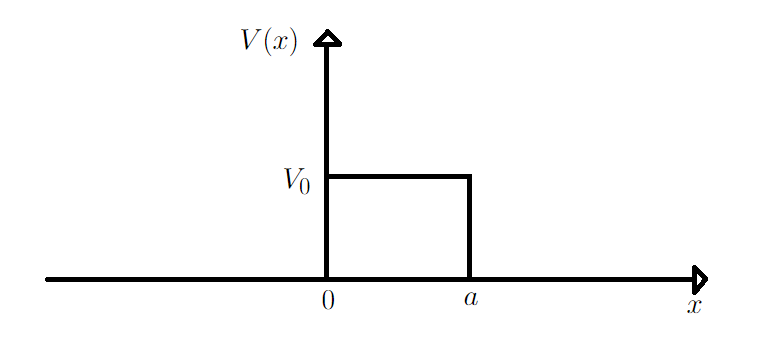

$$  {\begin{cases}
        V(x) = 0, \ para \ x<0\\
        \\
        V(x) = V_0, \ para \ 0<x<a \\
        \\
        V(x) = 0, \ para \ x>a \\
        \end{cases}
        } \ ,$$

de forma que em $x<0$ é a região I, em $0<x<a$ é a região II e em $x>a$ é a região III. Para resolver devemos começar com a equação de Schrödinger independente do tempo

$$ \frac{d^2\psi(x)}{dx^2} + \frac{2m}{\hbar^2}(E - V(x))\psi(x) = 0 \ . \tag{1.1}$$

$\quad$ A onda incidente se encontra na região I, onde $V(x) = 0$, assim a Equação **(1.1)** ficará da seguinte forma

$$ \frac{d^2\psi(x)}{dx^2} + \frac{2mE}{\hbar^2}\psi(x) = 0$$

$$ \implies \frac{d^2\psi(x)}{dx^2} = - \frac{2mE}{\hbar^2}\psi(x) \ .$$

$\quad$ A solução geral para esta EDO é $ \psi(x) = Ae^{ik_1x}$, em que $k_1 = \sqrt{\frac{2mE}{\hbar^2}}$. Com esse resultado podemos definir o a função de onda para o pacote de onda incidente e refletido. Dessa forma,

$$ \psi_I(x) = Ae^{ik_1x} \ , \tag{1.2}$$

$$ \psi_R = Be^{-ik1x} \ . \tag{1.3}$$

note que há um sinal de menos no expoente, porque a função de onda refletida será contrária à incidente.

$\quad$ Em seguida, na região II a Equação **(1.1)** ficará assim,

$$ \frac{d^2\psi(x)}{dx^2} + \frac{2m}{\hbar^2}(E - V_0)\psi(x) = 0$$

$$ \implies \frac{d^2\psi(x)}{dx^2} = \frac{2m}{\hbar^2}(V_0 - E)\psi(x) \ ,$$

a solução geral dessa EDO é $\psi(x) = Ce^{k_2x} + De^{-k_2x}$, em que $k_2 = \sqrt{\frac{2m(V_0 - E)}{\hbar^2}}$. Logo

$$ \psi_{II} = Ce^{k_2x} + De^{-k_2x} \ . \tag{1.4}$$

$\quad$ Por fim, para a região III a Equação **(1.1)** ficará da mesma forma que para o que foi feito para região I, ou seja, possuem a mesma solução. Com isso, agora temos o pacote de onda após o tunelamento, a onda transmitida

$$ \psi_T(x) = Fe^{ik_1x} \ . \tag{1.5}$$

$\quad$ Agora aplicaremos as condições de contorno, em que em $x=0$ as funções de onda da região I e II devem ser iguais e suas derivadas em torno desse ponto também, dessa forma

$$  {\begin{cases}
        A + B = C + D\\
        \\
        ik_1(A - B) = k_2(C - D)\\
        \end{cases}
        } \ .$$

$\quad$ Outras condições de contorno são as mesma, mas em torno do ponto $x=a$. Em outras palavras, as funções de onda da região II e III devem ser iguais e suas derivadas em torno desse ponto também, logo

$$  {\begin{cases}
        Ce^{k_2a} + De^{-k_2a} = Fe^{-k_1a}\\
        \\
        k_2(Ce^{k_2a} - De^{-k_2a}) = ik_1 Fe^{-k_1a}\\
        \end{cases}
        } \ .$$

$\quad$ Com essas informações podemos 

---

## Referências

**[1]** SHANKAR, R. Principles of Quantum Mechanics. [s.l.]: Springer Science, 1994.

**[2]** SAKURAI, J. J.; NAPOLITANO, J. MECâNICA QUÂNTICA MODERNA. [s.l.]: Pearson Education, 2013.

**[3]** RIBEIRO, M. A. C. et al. Os problemas de espalhamento quântico em potenciais elementares. Revista Brasileira de Ensino de Física, [s.l.], no 1, 2004. DOI: https://doi.org/10.1590/s1806-11172004000100001.

**[4]** SAFNE DE SOUZA SILVA, P.; PEREIRA DA SILVA, L. F. Uma Abordagem Didática Do Tunelamento quântico: a Partir Do Estudo Da Barreira Potencial Retangular Simples. Revista Física No Campus, [s.l.], no 2, 2023.